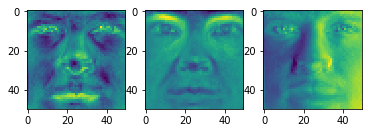

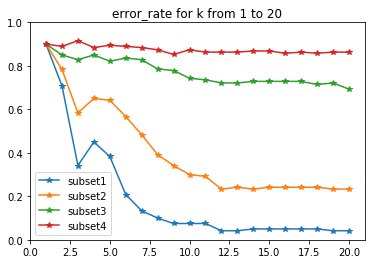

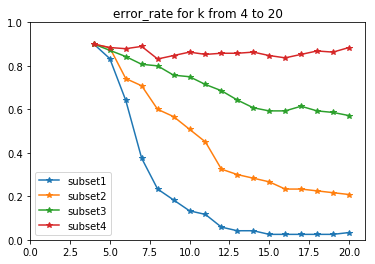

runing time is: 3.7364159999999997


In [1]:
# coding = utf-8
# programming in Python 3.5
author = 'Sen WANG' 'Jianxiang Feng' 'Hang XU' 'Zhenglei Hu'

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import time


## this function will take all files in a directory to form the Matrix T and lable
def getSetandlabel(impath):
	pathinput = os.listdir(impath)
	Tmatrix = np.array(np.zeros((50 * 50, 1)))
	count = 0
	Tlabel = []
	for infile in pathinput:
		count += 1
		tmppath = impath
		tmppath = tmppath + infile
		GImage = Image.open(tmppath).convert('L')
		image = np.array(GImage)
		img = image.reshape(1, image.size)
		Tmatrix = np.concatenate((Tmatrix, img.T), axis=1)
		Tlabel.append(int(infile[7]))
	Tlabel = np.array(Tlabel)
	tmp = Tmatrix[:, 1:]
	meanofT = np.mean(tmp, axis=1)
	T_meanremoved = tmp - np.tile(meanofT, (count, 1)).T
	return T_meanremoved, Tlabel


## get the SVD
def from_M_getU(M):
	U, s, V = np.linalg.svd(M, full_matrices=True)
	return U[:, 0:20]


## get the image from the first 3 PCs
## 2(1)
def fromSVtoImg(SV):
	plt.figure(1)
	plt.title('first 3 PCs')
	for i in range(0, 3):
		img = SV[:, i].reshape((50, 50))
		plt.subplot(1, 3, i+1)
		plt.imshow(img)
	return 0


## predict the error rate of one test set with the train set
## the last 3 inputs are u: loading matrix, l: the starting index of PCs,k: the end index of PCs
def prediction(Train_set, Train_label, S_set, S_label, u, l, k):
	Train_PCs =np.dot(u[:, l:k].T, Train_set)
	S_PCs = np.dot(u[:, l:k].T, S_set)
	Nsamples = len(S_PCs.T)

	# calculate the idstance between every test sample and train sample
	d1 = np.square(S_PCs).sum(axis=0)
	d2 = np.square(Train_PCs).sum(axis=0)
	D = np.dot(S_PCs.T, Train_PCs)
	D *= -2
	D += d1.reshape(-1, 1)
	D += d2
	D = np.sqrt(D)

	# find the index of maxdistance
	indk = np.argsort(D, axis=1)
	temple = Train_label[indk[:, 0:3]]
	predict = np.zeros(Nsamples)
	for i in range(Nsamples):
		counts = np.bincount(temple[i, :])
		imax = np.argmax(counts)
		predict[i] = imax

	error_rate = np.sum(predict != S_label)/len(predict)
	return error_rate


if __name__ == '__main__':
	path0 = 'yaleBfaces/subset0/'
	path1 = 'yaleBfaces/subset1/'
	path2 = 'yaleBfaces/subset2/'
	path3 = 'yaleBfaces/subset3/'
	path4 = 'yaleBfaces/subset4/'
	paths = [path1, path2, path3, path4]

	start = time.clock()
	Train_set, Train_label = getSetandlabel(path0)
	u = from_M_getU(Train_set)
	fromSVtoImg(u)
	S_set1, S_label1 = getSetandlabel(path1)
	S_set2, S_label2 = getSetandlabel(path2)
	S_set3, S_label3 = getSetandlabel(path3)
	S_set4, S_label4 = getSetandlabel(path4)
	S_set = [S_set1, S_set2, S_set3, S_set4]
	S_label = [S_label1, S_label2, S_label3, S_label4]

	# 2(1)
	plt.figure(2)
	plt.title('error_rate for k from 1 to 20')
	plt.axis([0, 21, 0, 1])
	for i in range(4):
		error2 = []
		for k in range(0, 20):
			k_error = prediction(Train_set, Train_label, S_set[i], S_label[i], u, 0, k)
			error2.append(k_error)
		plt.plot(range(1, 21), error2, '*-', label='subset'+str(i+1))
	plt.legend()

	## 2(3)
	plt.figure(3)
	plt.title('error_rate for k from 4 to 20')
	plt.axis([0, 21, 0, 1])
	for i in range(4):
		error3 = []
		for k in range(3, 20):
			k_error = prediction(Train_set, Train_label, S_set[i], S_label[i], u, 3, k)
			error3.append(k_error)
		plt.plot(range(4, 21), error3, '*-', label='subset'+str(i+1))
	plt.legend()
	plt.show()

	finish = time.clock()
	timeintv = finish - start # excuting time
	print('runing time is: ' + str(timeintv))
	plt.show()





